https://www.open3d.org/docs/latest/tutorial/Advanced/surface_reconstruction.html

In [1]:
import open3d as o3d
import matplotlib.pyplot as plt

o3d.__version__

'0.19.0'

RGBDImage of size 
Color image : 640x480, with 1 channels.
Depth image : 640x480, with 1 channels.
Use numpy.asarray to access buffer data.


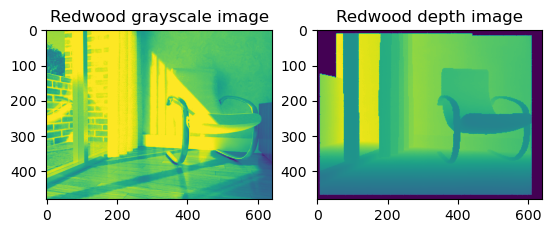

True

In [ ]:
color_raw = o3d.io.read_image("img/color_file_1.jpeg")
depth_raw = o3d.io.read_image("img/depth_file_1.png")
# 创建一个rgbd图像
rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(color_raw, depth_raw)
print(rgbd_image)

# 使用matplotlib显示图像
plt.subplot(1, 2, 1)
plt.title('Redwood grayscale image')
plt.imshow(rgbd_image.color)
plt.subplot(1, 2, 2)
plt.title('Redwood depth image')
plt.imshow(rgbd_image.depth)
plt.show()

# rgbd转pcd并显示
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(
    rgbd_image,
	o3d.camera.PinholeCameraIntrinsic(
		o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault
  	)
)
# Flip it, otherwise the pointcloud will be upside down
pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
o3d.visualization.draw_geometries([pcd])
o3d.io.write_point_cloud("pointcloud/test.pcd", pcd, format='auto', write_ascii=False, compressed=False, print_progress=True)

In [ ]:
def convert_ply_to_pcd(ply_file, pcd_file):
    point_cloud = o3d.io.read_point_cloud(ply_file)	# 读取PLY文件
    o3d.io.write_point_cloud(pcd_file, point_cloud)	# 保存为PCD文件

ply_file_path = "pointcloud/test_file_1.ply"
pcd_file_path = "pointcloud/test_file_1.pcd"
convert_ply_to_pcd(ply_file_path, pcd_file_path)

In [ ]:
# 显示pcd文件
pcd_file_path = "pointcloud/test_file_1.pcd"
pcd = o3d.io.read_point_cloud(pcd_file_path)
o3d.visualization.draw_geometries([pcd])

2025-03-10 16:10:46.042 python[63997:76064052] +[IMKClient subclass]: chose IMKClient_Legacy
2025-03-10 16:10:46.042 python[63997:76064052] +[IMKInputSession subclass]: chose IMKInputSession_Legacy
